# Pablo Andrés Aristizábal Castaño
### Ejercicio de Bonificación para el tercer parcial

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 196
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.7085.2626.214140401149739061368142942055
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.35'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL', 'CT_SOM5 SPI']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.7085.2626.214140401149739061368142942055
(0008, 0020) St

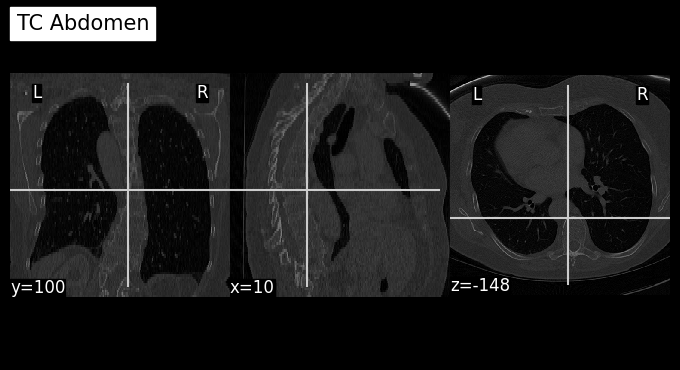

In [1]:
import pydicom
import dicom2nifti
import nilearn
import numpy
import os
from nilearn import plotting
class dicomFile:
    def __init__(self):
        self.dataDicom=None
        self.carpetaNifti=None
        self.nifti=None
    def cargarImagen(self,dataDicom,carpetaNifti):
        self.dataDicom=dataDicom
        self.carpetaNifti=carpetaNifti
        dicom2nifti.convert_directory(self.dataDicom,self.carpetaNifti) 
    def mostrarInfo(self):
        self.info=pydicom.dcmread(fr'{self.dataDicom}'+r'\000000.dcm')
        print(self.info)
    def visualizacion(self,coordenadas=[10,100,-148],titulo=None):
        ruta=os.listdir(self.carpetaNifti)
        for i in ruta:
            ruta_completa = os.path.join(self.carpetaNifti, i)
            img1=f'{ruta_completa}'
            plotting.plot_anat(img1,title=titulo,cut_coords=coordenadas)
    def infoImagen(self):
        ruta=os.listdir(self.carpetaNifti)
        for i in ruta:
            ruta_completa = os.path.join(self.carpetaNifti, i)
            img1=f'{ruta_completa}'
            img=nilearn.image.load_img(img1)
            shape=img.shape
            print(f"La imagen tiene tres dimensiones:\n"
            f"{shape[0]} píxeles en la dimensión sagital.\n"
            f"{shape[1]} píxeles en la dimensión coronal.\n"
            f"{shape[2]} cortes en la dimensión axial.")
estudio=dicomFile()
estudio.cargarImagen(r'C:\Users\Pablo\Informática ll\git.repositorio\Inform-tica-ll\Unidad 3\Datos',r'C:\Users\Pablo\Informática ll\git.repositorio\Inform-tica-ll\Unidad 3\Datos_nifti')
estudio.mostrarInfo()
estudio.infoImagen()
coordenadas=[]
for i in range(3):
    planos=['Sagital','Coronal','Axial']
    coordenadas1=int(input(f'Ingrese la coordenada del plano {planos[i]}'))
    coordenadas.append(coordenadas1)
titulo=input("Ingrese el título deseado de la imagen")
estudio.visualizacion(coordenadas,titulo)